In [2]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Inspect customers dataset
print(customers.info())
print(customers.describe())
print(customers.isnull().sum())  # Check for missing values

# Similarly for products and transactions
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product

In [4]:
# Fill missing data in customers (if any)
customers.fillna("Unknown", inplace=True)

# Drop transactions with missing Quantity or Price
transactions.dropna(subset=['Quantity', 'Price'], inplace=True)


In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [6]:
print(customers.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6 

In [7]:
# Analyze customer distribution by region
region_counts = customers['Region'].value_counts()
print(region_counts)


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


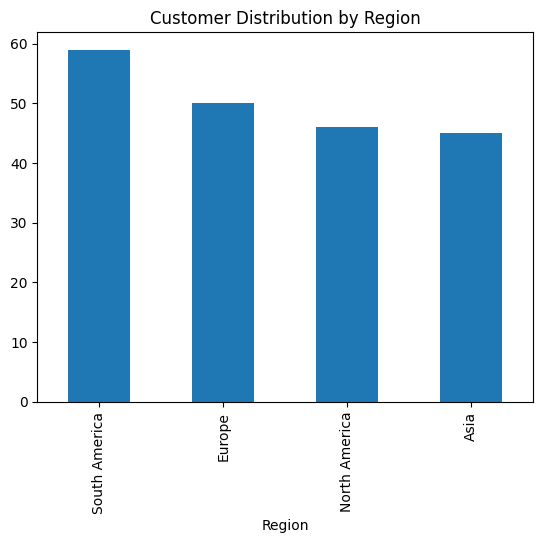

In [8]:
import matplotlib.pyplot as plt

# Plot customer distribution
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


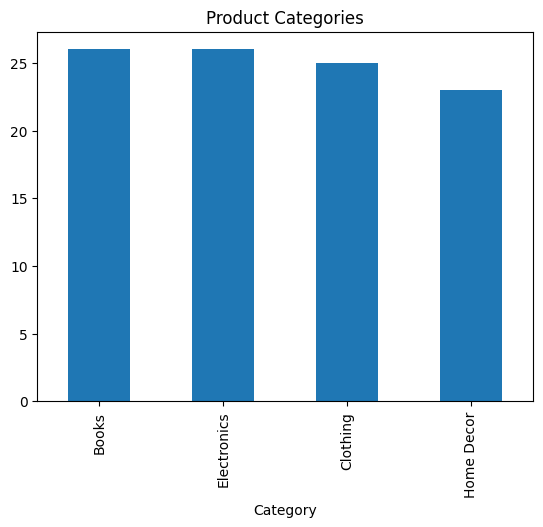

In [9]:
# Analyze product categories
category_counts = products['Category'].value_counts()
print(category_counts)

# Plot product categories
category_counts.plot(kind='bar', title='Product Categories')
plt.show()


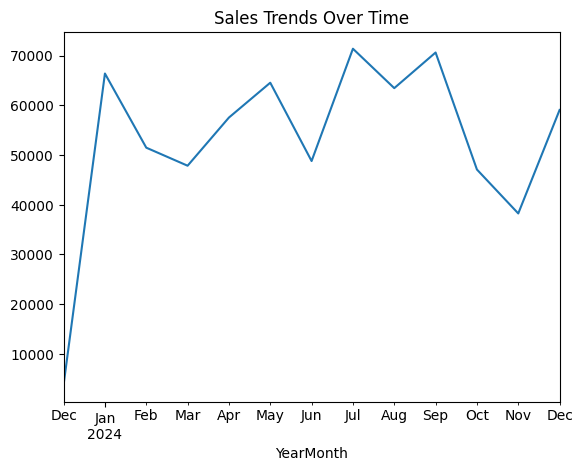

In [10]:
# Analyze sales trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
sales_trends.plot(kind='line', title='Sales Trends Over Time')
plt.show()


In [11]:
top_regions = transactions.groupby('Region')['TotalSales'].sum().sort_values(ascending=False)
print("Top-performing regions:\n", top_regions.head(3))


KeyError: 'Region'